# Predicting battery lifetime
## Peter Attia, Sept 16 2019

In [106]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm

In [107]:
# set plotting settings
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'

figsize_1col = (3.25,8.66) #ECS spec is 3.25" width
figsize_2col = (6.5,4.33)

## Load data
The data is stored in the `data` directory. The data was generated by the `generate_voltage_array.m` MATLAB script, which creates three folders of "voltage arrays" for the train, test1, and test2 splits in Severson et al.

We will load each dataset as 3D arrays of (cell idx, voltage position, cycle number).

In [108]:
def sortKeyFunc(s):
    return int(os.path.basename(s)[4:-4])

def load_dataset(folder):
    files = glob.glob('./data/'+folder+'/*.csv')
    files.sort(key=sortKeyFunc) # glob returns list with arbitrary order
    
    l = len(files)
    dataset = np.zeros((l,1000,99))
    for k, file in enumerate(files):
        cell = np.genfromtxt(file,delimiter=',')
        dataset[k,:,:] = cell # flip voltage dimension
    
    return dataset

In [109]:
train_data = load_dataset('train')
test1_data = load_dataset('test1')
test2_data = load_dataset('test2')

### Voltage array illustration

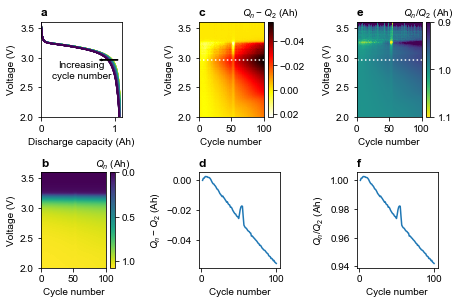

In [146]:
cellNum = 19
sample = train_data[cellNum,:,:]
Vdlin = np.linspace(3.6,2,1000)

colors = cm.get_cmap('viridis_r')(np.linspace(0, 1, 99))

plt.subplots(figsize=figsize_2col, nrows=2, ncols=3)

# a
plt.subplot(231)
plt.title('a',loc='left',weight='bold')

for k in np.arange(99):
    plt.plot(sample[:,k],Vdlin,color=colors[k])
plt.xlabel('Discharge capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.xlim((0,1.1))
plt.ylim((2,3.6))
plt.arrow(0.95, 0.6, -0.2, 0, transform=plt.gca().transAxes,zorder=3,head_width=0.02,color='k')
plt.text(0.5, 0.49, 'Increasing\ncycle number', horizontalalignment='center',
     verticalalignment='center',transform=plt.gca().transAxes)

# b
plt.subplot(234)
plt.imshow(sample, extent=[0,100,3.6,2.0], aspect='auto', origin='lower')
plt.xlabel('Cycle number')
plt.ylabel('Voltage (V)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_title(r'$Q_n$'+' (Ah)',fontsize=10)
cbar.ax.invert_yaxis() 
plt.title('b',loc='left',weight='bold')

# c
plt.subplot(232)
plt.title('c',loc='left',weight='bold')
Qsub = (sample[:,:].T - sample[:,0]).T
plt.imshow(Qsub, extent=[0,100,3.6,2.0], aspect='auto', cmap='hot', origin='lower')
plt.axhline(Vdlin[400],color='w',ls=':')
plt.gca().invert_yaxis()
plt.xlabel('Cycle number')
plt.ylabel('Voltage (V)')
cbar = plt.colorbar()
cbar.ax.set_title(r'$Q_n-Q_2$'+' (Ah)',fontsize=10)
cbar.ax.invert_yaxis() 

# d
plt.subplot(235)
plt.title('d',loc='left',weight='bold')
plt.plot(np.arange(2,101),Qsub[400,:])
plt.xlabel('Cycle number')
plt.ylabel(r'$Q_n-Q_2$'+' (Ah)')

# e
plt.subplot(233)
plt.title('e',loc='left',weight='bold')
Qdiv = (sample[:,:].T / sample[:,0]).T
np.savetxt('Qdiv.csv',Qdiv,delimiter=',')
plt.imshow(Qdiv, extent=[0,100,3.6,2.0], aspect='auto', origin='lower',vmin=0.9, vmax=1.1)
plt.axhline(Vdlin[400],color='w',ls=':')
plt.gca().invert_yaxis()
plt.xlabel('Cycle number')
plt.ylabel('Voltage (V)')
cbar = plt.colorbar()
cbar.ax.set_title(r'$Q_n/Q_2$'+' (Ah)',fontsize=10)
cbar.ax.invert_yaxis() 

# f
plt.subplot(236)
plt.title('f',loc='left',weight='bold')
plt.plot(np.arange(2,101),Qdiv[400,:])
plt.xlabel('Cycle number')
plt.ylabel(r'$Q_n/Q_2$'+' (Ah)')

# save
plt.tight_layout()
plt.savefig('figs/fig1a.eps',bbox_inches='tight',format='eps')

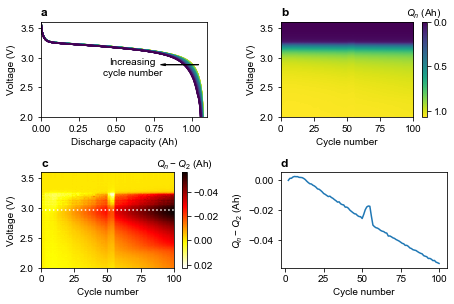

In [152]:
cellNum = 19
sample = train_data[cellNum,:,:]
Vdlin = np.linspace(3.6,2,1000)

colors = cm.get_cmap('viridis_r')(np.linspace(0, 1, 99))

plt.subplots(figsize=figsize_2col, nrows=2, ncols=3)

# a
plt.subplot(221)
plt.title('a',loc='left',weight='bold')

for k in np.arange(99):
    plt.plot(sample[:,k],Vdlin,color=colors[k])
plt.xlabel('Discharge capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.xlim((0,1.1))
plt.ylim((2,3.6))
plt.arrow(0.95, 0.55, -0.2, 0, transform=plt.gca().transAxes,zorder=3,head_width=0.02,color='k')
plt.text(0.55, 0.52, 'Increasing\ncycle number', horizontalalignment='center',
     verticalalignment='center',transform=plt.gca().transAxes)

# b
plt.subplot(222)
plt.imshow(sample, extent=[0,100,3.6,2.0], aspect='auto', origin='lower')
plt.xlabel('Cycle number')
plt.ylabel('Voltage (V)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.ax.set_title(r'$Q_n$'+' (Ah)',fontsize=10)
cbar.ax.invert_yaxis() 
plt.title('b',loc='left',weight='bold')

# c
plt.subplot(223)
plt.title('c',loc='left',weight='bold')
Qsub = (sample[:,:].T - sample[:,0]).T
plt.imshow(Qsub, extent=[0,100,3.6,2.0], aspect='auto', cmap='hot', origin='lower')
plt.axhline(Vdlin[400],color='w',ls=':')
plt.gca().invert_yaxis()
plt.xlabel('Cycle number')
plt.ylabel('Voltage (V)')
cbar = plt.colorbar()
cbar.ax.set_title(r'$Q_n-Q_2$'+' (Ah)',fontsize=10)
cbar.ax.invert_yaxis() 

# d
plt.subplot(224)
plt.title('d',loc='left',weight='bold')
plt.plot(np.arange(2,101),Qsub[400,:])
plt.xlabel('Cycle number')
plt.ylabel(r'$Q_n-Q_2$'+' (Ah)')

# save
plt.tight_layout()
plt.savefig('figs/fig1b.eps',bbox_inches='tight',format='eps')

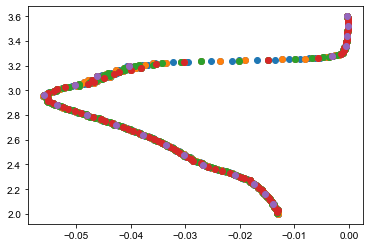

In [168]:
sample_cycle = Qsub[:,98]
plt.plot(sample_cycle,Vdlin,'o')
plt.plot(sample_cycle[0:-1:2],Vdlin[0:-1:2],'o')
plt.plot(sample_cycle[0:-1:4],Vdlin[0:-1:4],'o')
plt.plot(sample_cycle[0:-1:10],Vdlin[0:-1:10],'o')
plt.plot(sample_cycle[0:-1:50],Vdlin[0:-1:50],'o')